In [1]:
import pandas as pd
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier 
import random
%matplotlib inline
random.seed(25)

In [2]:
os.getcwd()
os.chdir("C:/Users/jhemmann/Desktop/edwisor-project-2/Project_bike")
os.getcwd()

'C:\\Users\\jhemmann\\Desktop\\edwisor-project-2\\Project_bike'

In [3]:
bike_df=pd.read_csv("day.csv")

#Print the `head` of the data
bike_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
bike_df.shape

(731, 16)

In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.6+ KB


In [8]:
# Target variable  analysis

#descriptive statistics summary
bike_df['cnt'].describe()

count     731.000000
mean     4504.348633
std      1937.211426
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

## single variable analysis

In [9]:
colnames = ['cnt','temp','atemp','hum','windspeed','casual','registered']

skewness = []

for col in colnames:
    skewness.append(bike_df[col].skew())

skewness_df = pd.DataFrame({'colnames' : colnames,
                           'skewness' : skewness})

skewness_df

,colnames,skewness
0,cnt,-0.047352
1,temp,-0.054521
2,atemp,-0.131088
3,hum,-0.069783
4,windspeed,0.677345
5,casual,1.266454
6,registered,0.043659


Skewness: -0.047352


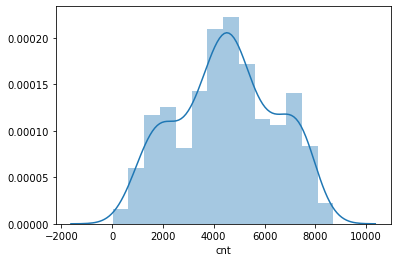

In [10]:
#Check whether target variable is normal or not
sns.distplot(bike_df['cnt']);
print("Skewness: %f" % bike_df['cnt'].skew())
#Here Skewness is very less so target variable  is normal distribution

Skewness: -0.054521


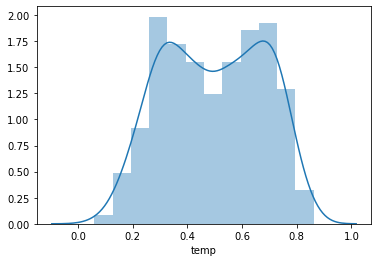

In [11]:
#Check whether  variable 'temp'is normal or not
sns.distplot(bike_df['temp']);
print("Skewness: %f" % bike_df['temp'].skew())

Skewness: -0.131088


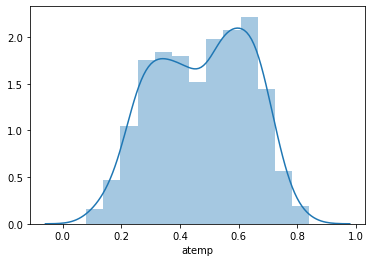

In [12]:
#Check whether  variable 'atemp'is normal or not
sns.distplot(bike_df['atemp']);
print("Skewness: %f" % bike_df['atemp'].skew())

Skewness: -0.069783


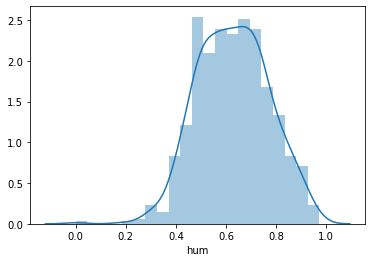

In [13]:
#Check whether  variable 'hum'is normal or not
sns.distplot(bike_df['hum']);
print("Skewness: %f" % bike_df['hum'].skew())

Skewness: 0.677345


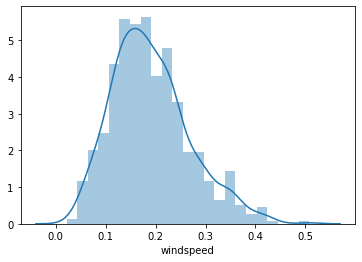

In [14]:
#Check whether  variable 'windspeed'is normal or not
sns.distplot(bike_df['windspeed']);
print("Skewness: %f" % bike_df['windspeed'].skew())

Skewness: 1.266454


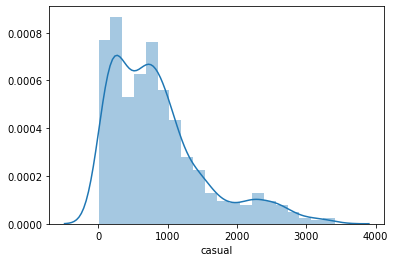

In [15]:
#Check whether  variable 'casual'is normal or not
sns.distplot(bike_df['casual']);
print("Skewness: %f" % bike_df['casual'].skew())

Skewness: 0.043659


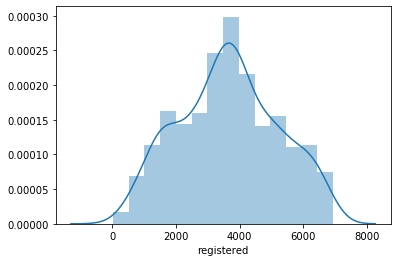

In [16]:
#Check whether  variable 'registered'is normal or not
sns.distplot(bike_df['registered']);
print("Skewness: %f" % bike_df['registered'].skew())

## multivariable analysis 

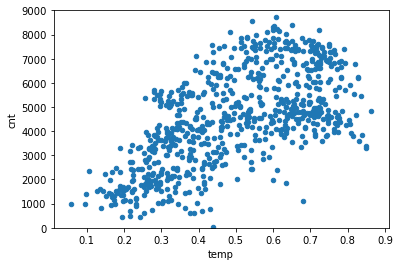

In [17]:
#relation between Numerical Variable 'temp' and target variable 'cnt'

var = 'temp'
data = pd.concat([bike_df['cnt'], bike_df[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'temp' and 'cnt'

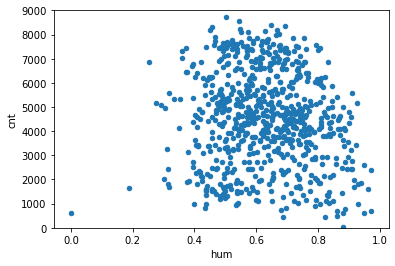

In [18]:
#Now draw scatter plot between 'hum' and 'cnt' variables

var = 'hum'
data = pd.concat([bike_df['cnt'], bike_df[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is average relation between 'atemp' and 'cnt'

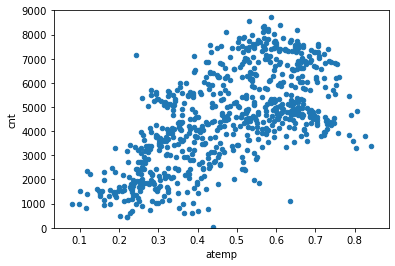

In [19]:
#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'atemp'
data = pd.concat([bike_df['cnt'], bike_df[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'atemp' and 'cnt'

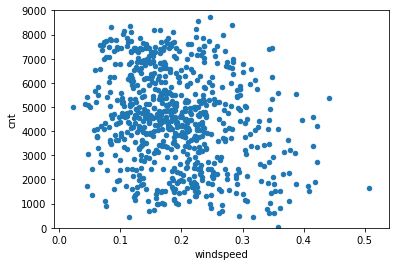

In [20]:
#Now draw scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([bike_df['cnt'], bike_df[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is nagative relation between 'windspeed' and 'cnt'

## missing  values Analysis

In [23]:
total_missing_values = bike_df.isnull().sum().sort_values(ascending=False)
total_missing_values

cnt           0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dteday        0
instant       0
dtype: int64

In [24]:
bike_df_copy =  bike_df.copy()

## Outlier Analysis

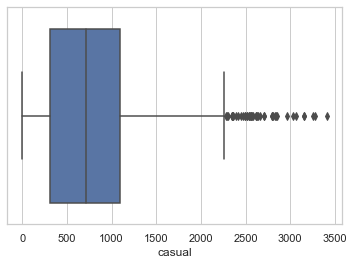

In [25]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=bike_df['casual'])

In [26]:
bike_df['casual'].corr(bike_df['cnt'])

0.6728044333386834

In [27]:
cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(bike_df.loc[:,i], [75 ,25])
    iqr = q75 - q25
           
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(f'min -> {min}')
print(f'max -> {max}')

bike_df_drop = bike_df.copy()

bike_df_drop = bike_df_drop.drop(bike_df_drop[bike_df_drop.loc[:,i] < min].index)
bike_df_drop = bike_df_drop.drop(bike_df_drop[bike_df_drop.loc[:,'casual'] > max].index)

min -> -855.25
max -> 2266.75


0.6460020508747337

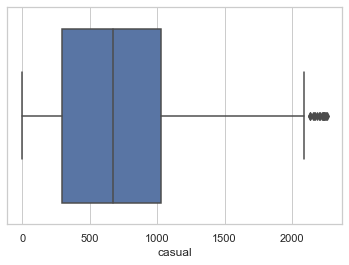

In [28]:
# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
ax = sns.boxplot(x=bike_df_drop['casual'])

bike_df_drop['casual'].corr(bike_df_drop['cnt'])

## feature  selection 

In [29]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654,985.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670,801.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229,1349.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454,1562.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518,1600.0


In [30]:
bike_num = bike_df.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]
bike_num.shape

(731, 7)

In [31]:
bike_num.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,0.99,1.0,0.14,-0.18,0.54,0.54,0.63
hum,0.13,0.14,1.0,-0.25,-0.077,-0.091,-0.1
windspeed,-0.16,-0.18,-0.25,1.0,-0.17,-0.22,-0.23
casual,0.54,0.54,-0.077,-0.17,1.0,0.4,0.67
registered,0.54,0.54,-0.091,-0.22,0.4,1.0,0.95
cnt,0.63,0.63,-0.1,-0.23,0.67,0.95,1.0


In [32]:
feature_selected_bike = bike_num.loc[:,['temp', 'windspeed', 'casual', 'registered', 'cnt']]

feature_selected_bike.shape

(731, 5)

In [33]:
feature_selected_bike.head()

,temp,windspeed,casual,registered,cnt
0,0.344167,0.160446,331.0,654,985.0
1,0.363478,0.248539,131.0,670,801.0
2,0.196364,0.248309,120.0,1229,1349.0
3,0.200000,0.160296,108.0,1454,1562.0
4,0.226957,0.186900,82.0,1518,1600.0


## feature  Scaling

In [34]:
cnames = ['casual','registered']
for feature_name in cnames:
        max_value = bike_df[feature_name].max()
        min_value = bike_df[feature_name].min()
        bike_df[feature_name] = (bike_df[feature_name] - min_value) / (max_value - min_value)

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0.096538,0.091539,985.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0.037852,0.093849,801.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,0.034624,0.174560,1349.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,0.031103,0.207046,1562.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,0.023474,0.216286,1600.0


## spliting the data into train and test

In [35]:
bike_ML_df = bike_df.drop(['atemp','hum'],axis = 1)
bike_ML_df.shape

(731, 14)

In [36]:
from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike_ML_df, test_size=0.2)

In [37]:
bike_train.shape

(584, 14)

In [38]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    print(f'MAPE : {mape}')

def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)

## Linear Regression

In [39]:
bike_train_feature = bike_train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
bike_train_target = bike_train['cnt'].values
bike_test_feature = bike_test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
bike_test_target = bike_test['cnt'].values

In [51]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

model = sm.OLS(bike_train_target,bike_train_feature).fit()
predictions = model.predict(bike_test_feature)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.316e+07
Date:                Fri, 07 Feb 2020   Prob (F-statistic):                        0.00
Time:                        19:36:50   Log-Likelihood:                         -1608.4
No. Observations:                 584   AIC:                                      3237.
Df Residuals:                     574   BIC:                                      3281.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4457      0.283      1.576      0.116      -0.110       1.001
x2            -1.0385      0.499     -2.081      0.038      -2.019      -0.058
x3             0.1242      0.082      1.519      0.129      -0.036       0.285
x4             2.6798      0.935      2.865      0.004       0.843       4.517
x5             0.3801      0.080      4.760      0.000       0.223       0.537
x6             4.1896      0.279     15.011      0.000       3.641       4.738
x7             4.7012      1.331      3.533      0.000       2.088       7.315
x8            29.7385      1.783     16.678      0.000      26.236      33.241
x9          3409.9482      1.079   3161.093      0.000    3407.829    3412.067
x10         6934.5430      1.371   5056.286      0.000    6931.849    6937.237
==============================================================================
Omnibus:                        5.032   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.055
Skew:                           0.227   Prob(JB):                       0.0798
Kurtosis:                       2.967   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#MAPE
MAPE(bike_test_target,predictions)

#RMSE
RMSE(bike_test_target,predictions)

MAPE : 0.09693464336052213
Mean Square :  13.560249593721965
Root Mean Square :  3.6824244179238717


## Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

RF_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(bike_train_feature,bike_train_target)
RF_one

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [43]:
RF_predict_one= RF_one.predict(bike_test_feature)
RF_predict_one

array([7721.412, 1016.872, 1147.368, 5317.262, 4571.172, 7363.342,
       2402.182, 4629.79 , 3739.762, 3394.398, 2408.566, 4570.386,
       4952.882, 3476.9  , 1923.43 , 7408.762, 5866.484, 4728.476,
       3681.874, 7818.166, 4399.652, 6045.29 , 7489.272, 2067.396,
       5101.156, 6771.536, 4673.546, 5135.386, 2059.542, 5885.586,
       7804.604, 4135.926, 4822.404, 6799.918,  689.754, 7385.328,
       8063.998, 4187.794, 3675.89 , 3436.31 , 6794.102, 7459.716,
       3540.41 , 4432.97 , 5326.9  , 6626.702, 3063.72 , 4733.502,
       2098.224, 4138.204, 2222.89 , 4278.494, 1036.65 , 4789.664,
       7905.776, 7426.73 , 5126.926, 5432.404, 1866.19 , 6224.668,
       7743.998, 4383.222, 2938.784, 4579.71 , 5371.85 , 3970.18 ,
       4710.684, 5840.94 , 5720.826, 3954.944, 6257.376, 5325.57 ,
       7510.074, 6431.534, 6565.462, 4293.052, 5835.844, 2151.436,
       7491.278, 3179.516, 3619.756, 1587.604, 3818.844, 6013.6  ,
       3404.53 , 1969.73 , 2548.156, 5142.184, 4302.62 , 5001.

In [44]:
#MAPE 
MAPE(bike_test_target,RF_predict_one)

#RMSE
RMSE(bike_test_target,RF_predict_one)

MAPE : 1.6979751778680088
Mean Square :  19812.448761959182
Root Mean Square :  140.75670059346794


## Decision Tree Regressor

In [45]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\jhemmann\AppData\Local\Continuum\anaconda3\envs\rstudio\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [46]:
from sklearn.tree import DecisionTreeRegressor

DT1 = DecisionTreeRegressor()
DT1 = DT1.fit(bike_train_feature, bike_train_target)
print(DT1)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [47]:
dot_data = StringIO()
export_graphviz(DT1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.649997 to fit



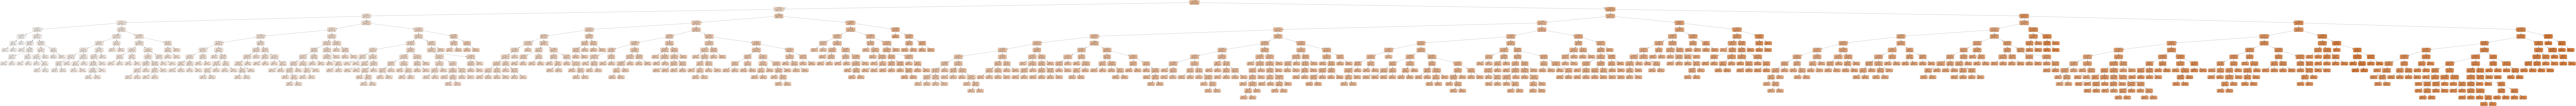

In [48]:
Image(graph.create_png())

In [49]:
#predicting
prediction_DT = DT1.predict(bike_test_feature)
print(prediction_DT)

[7605. 1011. 1107. 5191. 4634. 7261. 2493. 4648. 3761. 3523. 2416. 4460.
 4881. 3717. 2034. 7328. 6031. 4714. 3727. 8294. 4679. 5668. 7273. 2034.
 4978. 6299. 4940. 4940. 2034. 7132. 8120. 4128. 4790. 6824.  605. 7410.
 7965. 4270. 3641. 3574. 6591. 7429. 3717. 4375. 5259. 6591. 3249. 4864.
 2046. 4128. 2209. 4381. 1011. 5130. 8009. 7436. 5119. 5362. 1834. 6436.
 7641. 4375. 2843. 4541. 5259. 3922. 4788. 6536. 5892. 3855. 6169. 5255.
 7328. 6169. 6304. 4511. 5847. 2209. 7458. 2918. 3717. 1623. 3867. 6241.
 3392. 1917. 2659. 4916. 4475. 5058. 5511. 6312. 2368. 4460. 5847. 7639.
 7461. 5362. 1600. 1501. 1913. 7132. 7691. 2765.  683. 4068. 7591. 2425.
 6778. 3669. 4367. 7691. 6359. 2455. 5515. 1538. 5107. 5336. 4401. 4270.
 7363. 3959. 1635. 4342. 4826. 3915. 3717. 5345. 6234. 4917. 6207. 7363.
 5585. 7429. 2918. 6133. 3005. 7216. 3717. 4189. 3574. 7697. 2471. 1749.
 5728. 5459. 4833.]


In [50]:
#MAPE 
MAPE(bike_test_target,prediction_DT)

#RMSE
RMSE(bike_test_target,prediction_DT)

MAPE : 3.081566305587881
Mean Square :  44046.19727891157
Root Mean Square :  209.87185918772332
